In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [108]:
df=pd.read_csv("../dataset/data_cleaned.csv")

In [109]:
df.head()

,Bea Dasar,Htnb,Total,Harga Barang,Berat Kiriman,Jarak (KM)
0,34000.0,960.0,34960.0,400000.0,1.00,1042.297394
1,28000.0,500.0,28500.0,200000.0,0.50,55.550328
2,19000.0,0.0,19000.0,15000.0,0.15,59.972951
3,17000.0,1920.0,18920.0,800000.0,2.60,12.435856
4,18500.0,500.0,19000.0,200000.0,1.00,123.701070


In [110]:
scaler = MinMaxScaler()

# Normalisasi data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Cetak hasil data yang sudah dinormalisasi
print(df_scaled)

      Bea Dasar      Htnb     Total  Harga Barang  Berat Kiriman  Jarak (KM)
0      0.013818  0.026667  0.014135      0.026667       0.008333    0.434647
1      0.010747  0.013889  0.010870      0.013333       0.004167    0.018196
2      0.006141  0.000000  0.006067      0.001000       0.001250    0.020063
3      0.005118  0.053333  0.006026      0.053333       0.021667    0.000000
4      0.005885  0.013889  0.006067      0.013333       0.008333    0.046959
...         ...       ...       ...           ...            ...         ...
3427   0.001024  0.000000  0.001011      0.001033       0.000417    0.046959
3428   0.001535  0.000000  0.001517      0.001500       0.000417    0.010468
3429   0.002047  0.000000  0.002022      0.002567       0.001083    0.037438
3430   0.000000  0.000000  0.000000      0.001000       0.000417    0.000000
3431   0.001024  0.000000  0.001011      0.000720       0.001000    0.046959

[3432 rows x 6 columns]


In [111]:
# Fitur dan target
# X = df_scaled[['Berat Kiriman', 'Jarak (KM)']]
X = df_scaled[['Harga Barang', 'Berat Kiriman', 'Jarak (KM)', 'Htnb']]
y = df_scaled['Bea Dasar']

In [112]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Harga Barang vs Bea Dasar')

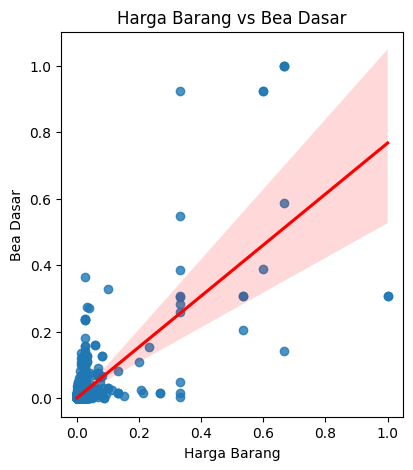

In [113]:

# Visualisasi
plt.figure(figsize=(15, 5))

# Plot 1: Harga Barang vs Bea Dasar
plt.subplot(1, 3, 1)
sns.regplot(x='Harga Barang', y='Bea Dasar', data=df_scaled, line_kws={"color": "red"})
plt.title('Harga Barang vs Bea Dasar')

Text(0.5, 1.0, 'Berat Kiriman vs Bea Dasar')

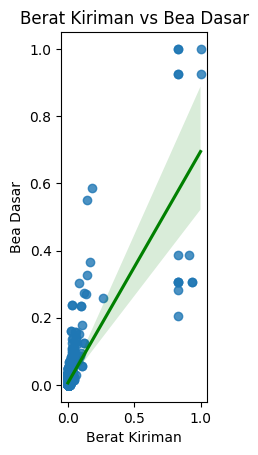

In [114]:
# Plot 2: Berat Kiriman vs Bea Dasar
plt.subplot(1, 3, 2)
sns.regplot(x='Berat Kiriman', y='Bea Dasar', data=df_scaled, line_kws={"color": "green"})
plt.title('Berat Kiriman vs Bea Dasar')

Text(0.5, 1.0, 'Jarak (KM) vs Bea Dasar')

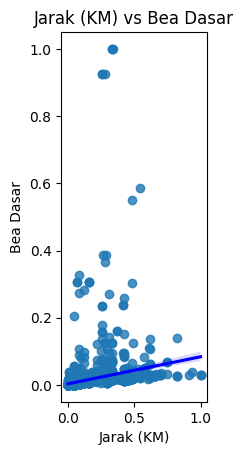

In [115]:
# Plot 3: Jarak (KM) vs Bea Dasar
plt.subplot(1, 3, 3)
sns.regplot(x='Jarak (KM)', y='Bea Dasar', data=df_scaled, line_kws={"color": "blue"})
plt.title('Jarak (KM) vs Bea Dasar')

In [116]:

# Membuat model regresi linier
model = LinearRegression()


In [117]:
# Melatih model
model.fit(X_train, y_train)


LinearRegression()

In [118]:
# Memprediksi bea dasar pada data uji
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Cetak hasil evaluasi dengan dua angka di belakang koma
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Squared Error (MSE): 0.001
Root Mean Squared Error (RMSE): 0.024
Mean Absolute Error (MAE): 0.007
R-squared (R²): 0.706


In [119]:

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Koefisien regresi
print("Koefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.0005659951471380638
R-squared: 0.7064481563228003
Koefisien regresi: [0.07017602 0.56040659 0.05490488 0.09631126]
Intercept: -0.001399922338360969
